In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
import numpy as np
experiment_result_folder = '/Users/sanjanatule/Documents/uq/Projects/mipindel/evaluation/real/'
data_folder = '/Users/sanjanatule/Documents/uq/Projects/mipindel/data/real/'
plot_output_folder = '/Users/sanjanatule/Documents/uq/Projects/mipindel/plots_for_paper/'

In [26]:
plt.rc('axes',  titlesize=15)     # fontsize of the axes title
plt.rc('axes',  labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend',fontsize=10)    # legend fontsize
plt.rc('font',  size=12)          # controls default text sizes
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Serif"
colors = sns.color_palette('deep')
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15,9)})
sns.set_style("ticks")

In [3]:
pr_families = ['CYP2U_165','B3_225','RNaseZ_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','RNaseZ_624','KARI_716','KARI_1176','ALPHA_1263','DHAD_1612','CYP2CE_1656','DHAD_1658','ALS_1990']

# 1 - DIFFERENCE IN INDEL EVENTS

In [7]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'indel_diff_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,score\n')
    for pr in pr_families:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*indscore*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 
score_data = pd.read_csv(experiment_result_folder + 'indel_diff_evaluation.csv')
score_data['protein_family'] = pd.Categorical(score_data['protein_family'],pr_families)
score_data = score_data.sort_values(['protein_family',"method"])
score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()

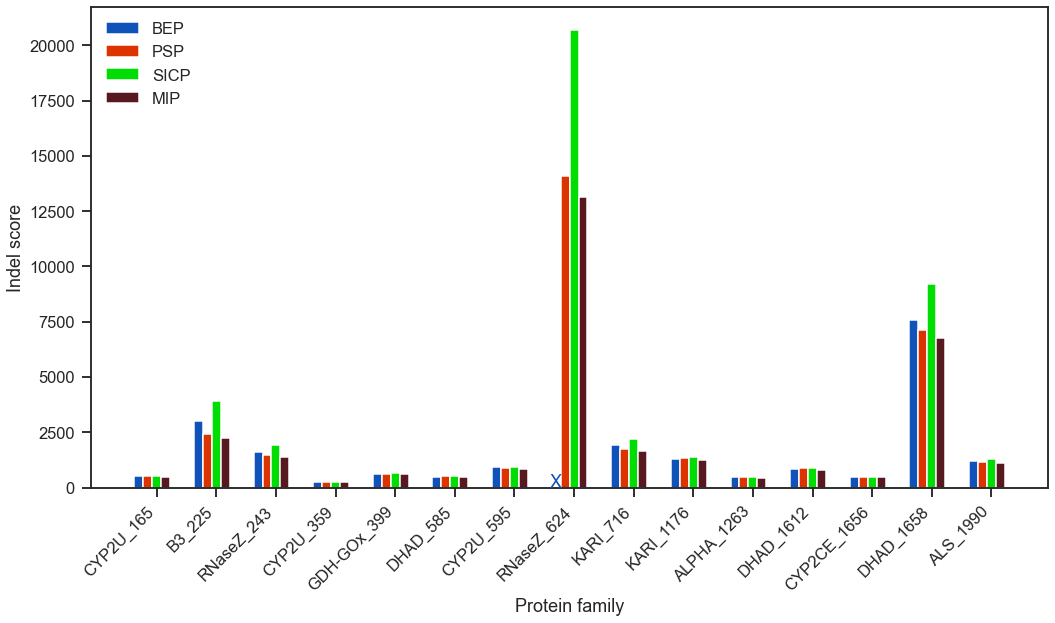

In [29]:
sns.set_context('talk')
labels = score_data['protein_family']
x = np.arange(len(labels)) 
width = 0.3
fig,ax1 = plt.subplots(tight_layout=True)
rects1 = ax1.bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
rects2 = ax1.bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
rects3 = ax1.bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
rects4 = ax1.bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
ymin, ymax = plt.ylim()

# did not run
ax1.text(6.6,20, "X",color='#0F52BA',size='medium')

ax1.set_ylabel('Indel score')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,ha="right")
ax1.set_xlabel('Protein family')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
filename = plot_output_folder + "Real_indel_score_comparison_plot.jpg"
fig.savefig(filename,dpi=1000)
plt.show()

# 2 - OUT OF DISTRIBUTION PATTERNS


In [30]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'out_of_dist_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,out_of_dist_percent\n')
    for pr in pr_families:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*out_dist_percent*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 
                    
out_of_dist_data = pd.read_csv(experiment_result_folder + 'out_of_dist_evaluation.csv')
out_of_dist_data['protein_family'] = pd.Categorical(out_of_dist_data['protein_family'],pr_families)
out_of_dist_data = out_of_dist_data.sort_values(['protein_family',"method"])
out_of_dist_data = out_of_dist_data.pivot(index='protein_family', columns='method', values='out_of_dist_percent').reset_index()
out_of_dist_data.head(10)

method,protein_family,bep,mip,psp,sicp
0,CYP2U_165,0.0,0.0,6.7,0.0
1,B3_225,0.4,0.0,13.4,2.7
2,RNaseZ_243,0.0,0.0,13.2,0.0
3,CYP2U_359,0.0,0.0,0.8,0.0
4,GDH-GOx_399,0.0,0.0,0.5,0.0
5,DHAD_585,0.2,0.0,0.7,0.0
6,CYP2U_595,0.0,0.0,1.9,0.0
7,RNaseZ_624,NaN,0.0,33.4,14.6
8,KARI_716,0.0,0.0,0.4,0.0
9,KARI_1176,0.0,0.0,0.3,0.0


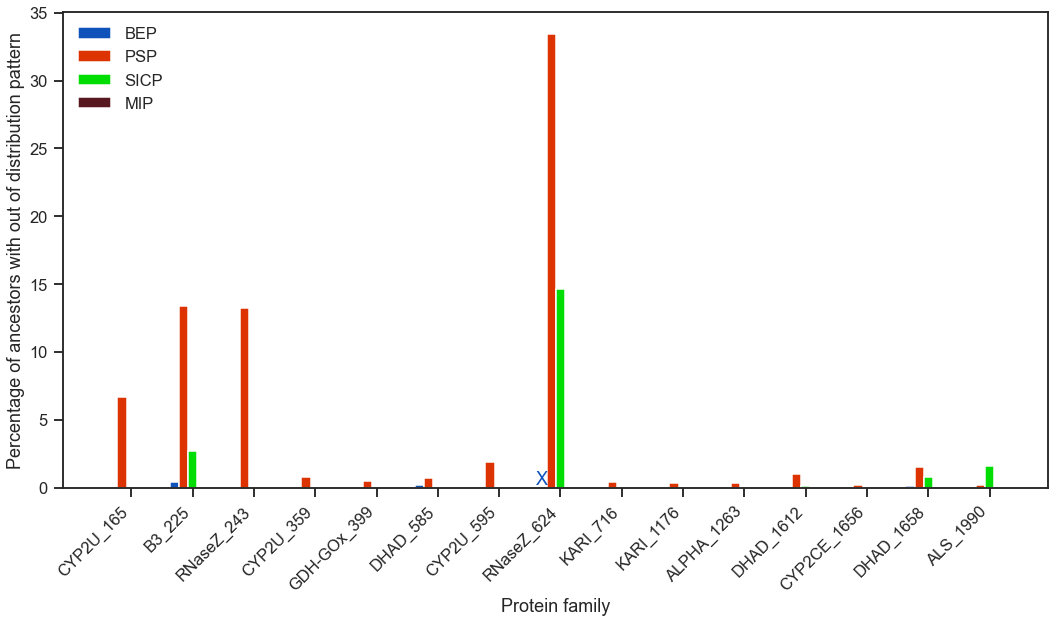

In [36]:
sns.set_context('talk')
labels = out_of_dist_data['protein_family']
x = np.arange(len(labels)) 
width = 0.3
fig,ax1 = plt.subplots(tight_layout=True)
rects1 = ax1.bar(x - width/2 - width/2, out_of_dist_data['bep'], width/2, label='BEP',color='#0F52BA')
rects2 = ax1.bar(x - width/2, out_of_dist_data['psp'], width/2, label='PSP',color='#DD3300')
rects3 = ax1.bar(x, out_of_dist_data['sicp'], width/2, label='SICP',color='#00DD03')
rects4 = ax1.bar(x + width/2, out_of_dist_data['mip'], width/2, label='MIP',color='#58181F')
ymin, ymax = plt.ylim()

# did not run
ax1.text(6.6,0.21, "X",color='#0F52BA',size='medium')

ax1.set_ylabel('Percentage of ancestors with out of distribution pattern')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,ha="right")
ax1.set_xlabel('Protein family')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
filename = plot_output_folder + "Real_out_of_dist_comparison_plot.jpg"
fig.savefig(filename,dpi=1000)
# fig.tight_layout()
plt.show()

# 3 - COHESIVENESS MEASURE

### 3.0 - ANCESTORS WITH 3 MUTATION AWAY FROM ITS NEIGHBOURS

In [37]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'ancestors_3_mutation_away.csv', 'w') as outfile:
    outfile.write('protein_family,method,ancestors_3_mutation_percent\n')
    for pr in pr_families:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*ancestors_with_3_mut*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 
                    
a_3_mut_data = pd.read_csv(experiment_result_folder + 'ancestors_3_mutation_away.csv')
a_3_mut_data['protein_family'] = pd.Categorical(a_3_mut_data['protein_family'],pr_families)
a_3_mut_data = a_3_mut_data.sort_values(['protein_family',"method"])
a_3_mut_data = a_3_mut_data.pivot(index='protein_family', columns='method', values='ancestors_3_mutation_percent').reset_index()
a_3_mut_data.head(10)

method,protein_family,bep,mip,psp,sicp
0,CYP2U_165,1.22,0.00,0.00,0.00
1,B3_225,7.59,0.00,0.89,4.46
2,RNaseZ_243,2.07,0.00,0.00,2.07
3,CYP2U_359,0.00,0.00,0.00,0.00
4,GDH-GOx_399,0.00,0.00,0.00,0.00
5,DHAD_585,0.17,0.00,0.00,0.34
6,CYP2U_595,0.17,0.00,0.00,0.34
7,RNaseZ_624,NaN,0.16,2.41,8.51
8,KARI_716,0.28,0.00,0.00,0.42
9,KARI_1176,0.17,0.00,0.00,0.26


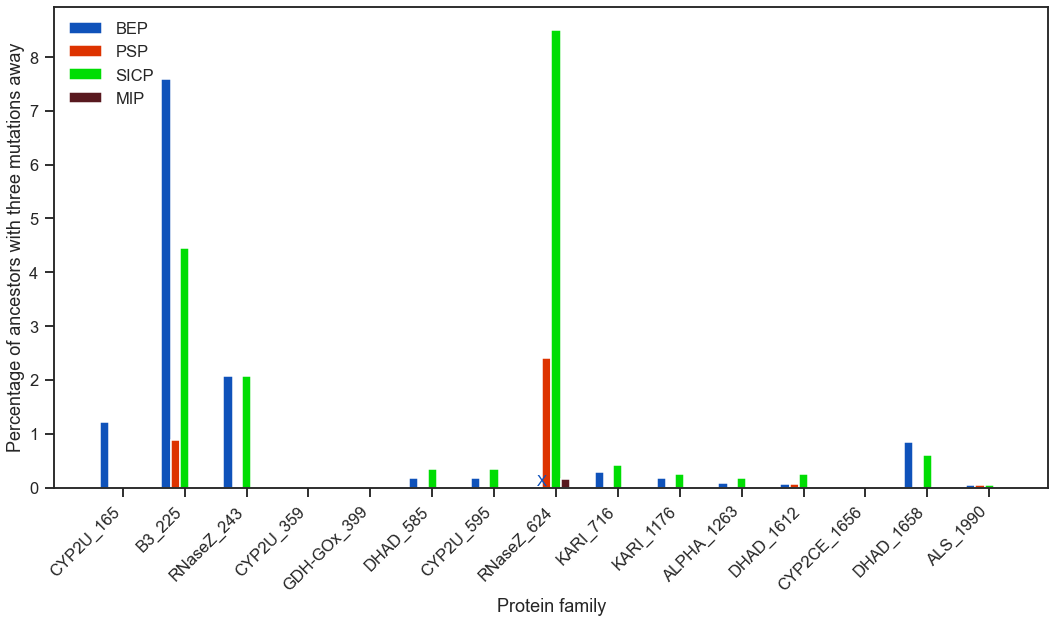

In [40]:
sns.set_context('talk')
labels = a_3_mut_data['protein_family']
x = np.arange(len(labels)) 
width = 0.3
fig,ax1 = plt.subplots(tight_layout=True)
rects1 = ax1.bar(x - width/2 - width/2, a_3_mut_data['bep'], width/2, label='BEP',color='#0F52BA')
rects2 = ax1.bar(x - width/2, a_3_mut_data['psp'], width/2, label='PSP',color='#DD3300')
rects3 = ax1.bar(x, a_3_mut_data['sicp'], width/2, label='SICP',color='#00DD03')
rects4 = ax1.bar(x + width/2, a_3_mut_data['mip'], width/2, label='MIP',color='#58181F')
ymin, ymax = plt.ylim()

# did not run
ax1.text(6.7,0.04, "X",color='#0F52BA',size='small')

ax1.set_ylabel('Percentage of ancestors with three mutations away')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,ha="right")
ax1.set_xlabel('Protein family')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
filename = plot_output_folder + "Real_ancestors_percent_3_mutation_comparison_plot.jpg"
fig.savefig(filename,dpi=1000)
# fig.tight_layout()
plt.show()